In [22]:
# Install deps

# %pip install seaborn

In [2]:
# Load Pandas Lib

import pandas as pd

In [23]:
# Load Dataset
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

df = pd.read_csv('../data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# ML Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Prepare Features
columns_to_drop = ['Class']
features = df.drop(columns_to_drop, axis=1)
features.head()

# Prepare Labels
labels = df["Class"]
labels.head()


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)

In [8]:
# Create Logistic Regression Model

model = LogisticRegression(max_iter=1000)


In [9]:
# Train model on training data
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Predict using model

y_pred = model.predict(x_test)

In [11]:

accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy}")

Accuracy: 0.9991748885221726


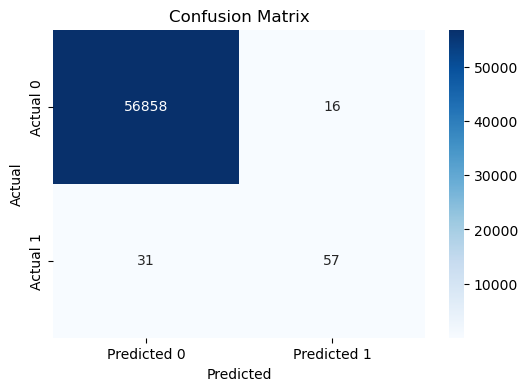

In [20]:
# Draw a confusion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()